In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# LFVHD Scotogenic model 
## Diagrams
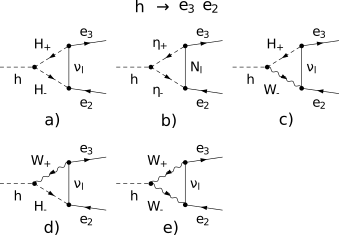

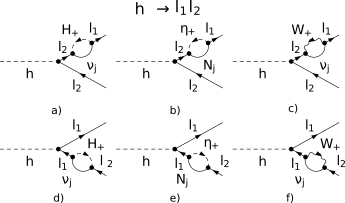

Our conventions to this Feynman diagrams are shown below

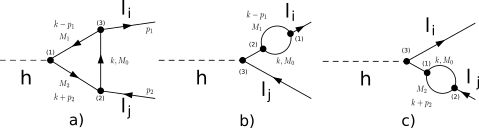

## Couplings

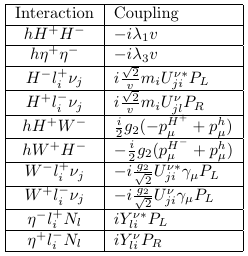

In [2]:
from sympy import symbols, init_printing, conjugate,I,IndexedBase,sqrt,collect,simplify
from sympy import lambdify, Add, Symbol
init_printing()

In [3]:
import OneLoopLFVHD as lfvhd

In [4]:
mh,mi,mj = lfvhd.ma,lfvhd.mi,lfvhd.mj
mh,mi,mj

In [5]:
from mpmath import mp

In [6]:
mp.dps = 80; mp.pretty = True

## Light neutrino contribution 

### FSS contribution

We have two posibles diagrams with this form the first one is $\nu_l H^{+} H^{-}$, then we need the next couplings
$h H^{+} H^{-} \rightarrow -i \lambda_1 v$, $H^{-}\mu^{+} \nu_{l} \rightarrow i \frac{\sqrt{2}}{v} m_2 U^{\nu *}_{l2} P_{L}$ and 
$H^{+}\tau^{-} \nu_{l} \rightarrow i \frac{\sqrt{2}}{v} m_1 U^{\nu}_{l3} P_{R}$ assuming summation on repeated indexes

In [7]:
g,v = symbols(r'g,v',real=True)
λ1 = mh**2/v**2
U = IndexedBase(r'U')
mnul,mW = symbols(r'm_{{\nu_l}},m_W',real=True)

l,b,i,j = symbols('l,b,i,j',integer=True)
hGdGu = lfvhd.VertexHSS(-I*λ1*v)
Guljνl = lfvhd.VertexSFF(I*(sqrt(2)/v)*mj*U[l,j],0)
Gdliνl = lfvhd.VertexSFF(0,I*(sqrt(2)/v)*mi*conjugate(U[l,i]))

# Guljνl = lfvhd.VertexSFF((I*g)/(sqrt(2)*mW)*mj*U[l,j],(-I*g)/(sqrt(2)*mW)*mnul*U[l,j])
# Gdliνl = lfvhd.VertexSFF((-I*g)/(sqrt(2)*mW)*mnul*conjugate(U[l,i]),
#                          (I*g)/(sqrt(2)*mW)*mi*conjugate(U[l,i]))


In [8]:
νlGG = lfvhd.TriangleFSS(hGdGu,Guljνl,Gdliνl,[mnul,mW,mW])

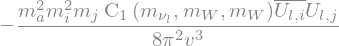

In [9]:
νlGG.AR().simplify()

In [10]:
str(νlGG.AR()).replace('m_a','ma').replace(
    'm_i','mi').replace('m_j','mj'
                       ).replace('m_W','mW').replace('m_{{\\nu_l}}','mnul').replace(
    'conjugate(U[l, i])','Ucli').replace('U[l, j]','Ulj')

'-ma**2*mi**2*mj*C_1(mnul, mW, mW)*Ucli*Ulj/(8*pi**2*v**3)'

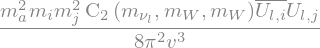

In [11]:
νlGG.AL().simplify()

In [12]:
str(νlGG.AL()).replace('m_a','ma').replace(
    'm_i','mi').replace('m_j','mj'
                       ).replace('m_W','mW').replace('m_{{\\nu_l}}','mnul').replace(
    'conjugate(U[l, i])','Ucli').replace('U[l, j]','Ulj')

'ma**2*mi*mj**2*C_2(mnul, mW, mW)*Ucli*Ulj/(8*pi**2*v**3)'

## FSV contribution
In this case we only have one contribution, $\nu_{l} H^{+} W^{-}$, the we need to consider the next couplings
$h H^{+} W^{-} \rightarrow -\frac{i}{2}g_2 (p^{H^{+}}_\mu - p^{h}_\mu)$, $W^{-} \mu^{+} \nu_{l} \rightarrow -i \frac{g_2}{\sqrt{2}}U^{\nu *}_{l2} \gamma_\mu P_L$ and $ H^{+} \tau^{-} \nu_l \rightarrow i Y^{e*}_{3,b}U^{\nu}_{lb} P_R$

In [13]:
hGdWu = lfvhd.VertexHSpVm(-I*g/2)
Wuljνl = lfvhd.VertexVFF(0,-I*(g/sqrt(2))*U[l,j])


In [14]:
νlGW = lfvhd.TriangleFSV(hGdWu,Wuljνl,Gdliνl,[mnul,mW,mW])
#triangulo['νlGW'] = νlGW

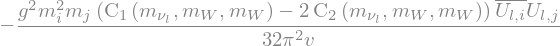

In [15]:
νlGW.AR().factor()

In [16]:
str(νlGW.AR()).replace('m_a','ma').replace(
    'm_i','ml[i]').replace('m_j','ml[j]'
                       ).replace('m_W','mW').replace('m_{{\\nu_l}}','mnul').replace(
    'conjugate(U[l, i])','Ucli').replace('U[l, j]','Ulj')

'-g**2*ml[i]**2*ml[j]*(C_1(mnul, mW, mW) - 2*C_2(mnul, mW, mW))*Ucli*Ulj/(32*pi**2*v)'

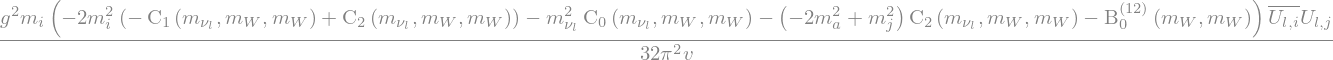

In [17]:
(νlGW.AL())#.expand().collect([νlGW.Cs])

In [18]:
str(νlGW.AL()).replace('m_a','ma').replace(
    'm_i','ml[i]').replace('m_j','ml[j]'
                       ).replace('m_W','mW').replace('m_{{\\nu_l}}','mnul').replace(
    'conjugate(U[l, i])','Ucli').replace('U[l, j]','Ulj').replace('{{B^{(12)}_{0}}}','B12_0')

'g**2*ml[i]*(-2*ml[i]**2*(-C_1(mnul, mW, mW) + C_2(mnul, mW, mW)) - mnul**2*C_0(mnul, mW, mW) - (-2*ma**2 + ml[j]**2)*C_2(mnul, mW, mW) - B12_0(mW, mW))*Ucli*Ulj/(32*pi**2*v)'

## FVS contribution
In this case we only have one contribution too, $\nu_{l} W^{+} H^{-}$, the we need to consider the next couplings
$h W^{+} H^{-} \rightarrow -\frac{i}{2}g_2 (-p^{H^{-}}_\mu + p^{h}_\mu)$, $ H^{-} \mu^{+} \nu_l \rightarrow i U^{\nu *}_{lb} Y^{e}_{2b}P_L$ and $W^{+} \tau^{-} \nu_{l} \rightarrow -i \frac{g_2}{\sqrt{2}}U^{\nu}_{l3} \gamma_\mu P_L$

In [19]:
hWdGu = lfvhd.VertexHVpSm(-I*g/2)
#Hdμνl
Wdliνl = lfvhd.VertexVFF(0,-I*(g/sqrt(2))*conjugate(U[l,i]))


In [20]:
νlWG = lfvhd.TriangleFVS(hWdGu,Guljνl,Wdliνl,[mnul,mW,mW])
#triangulo['νlWG'] = νlWG

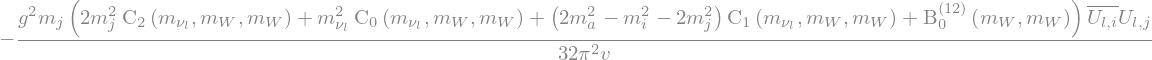

In [21]:
νlWG.AR()

In [22]:
str(νlWG.AR()).replace('m_a','ma').replace(
    'm_i','ml[i]').replace('m_j','ml[j]'
                       ).replace('m_W','mW').replace('m_{{\\nu_l}}','mnul').replace(
    'conjugate(U[l, i])','Ucli').replace('U[l, j]','Ulj').replace('{{B^{(12)}_{0}}}','B12_0')

'-g**2*ml[j]*(2*ml[j]**2*C_2(mnul, mW, mW) + mnul**2*C_0(mnul, mW, mW) + (2*ma**2 - ml[i]**2 - 2*ml[j]**2)*C_1(mnul, mW, mW) + B12_0(mW, mW))*Ucli*Ulj/(32*pi**2*v)'

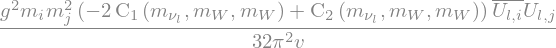

In [23]:
νlWG.AL()#.subs(cambiosDivFin(*Masas4)).simplify()

In [24]:
str(νlWG.AL()).replace('m_a','ma').replace(
    'm_i','ml[i]').replace('m_j','ml[j]'
                       ).replace('m_W','mW').replace('m_{{\\nu_l}}','mnul').replace(
    'conjugate(U[l, i])','Ucli').replace('U[l, j]','Ulj').replace('{{B^{(12)}_{0}}}','B12_0')

'g**2*ml[i]*ml[j]**2*(-2*C_1(mnul, mW, mW) + C_2(mnul, mW, mW))*Ucli*Ulj/(32*pi**2*v)'

## FVV contribution
In this case we only have one contribution too, $\nu_{l} W^{+} W^{-}$, the we need to consider the next couplings
$h W^{+} W^{-} \rightarrow \frac{i}{2}g_2^2 v g_{\mu \nu}$, $ W^{-} \mu^{+} \nu_l \rightarrow -i \frac{g_2}{\sqrt{2}}U^{\nu*}_{l2} \gamma_\mu P_L$ and $W^{+} \tau^{-} \nu_{l} \rightarrow -i \frac{g_2}{\sqrt{2}}U^{\nu}_{l3} \gamma_\mu P_L$

In [25]:
hWdWu = lfvhd.VertexHVV(I*g**2/2*v)
#Wdμνl = lfvhd.VertexVFF(0,-I*(g2/sqrt(2))*conjugate(U[l,j]))
#Wuτνl 

In [26]:
νlWW = lfvhd.TriangleFVV(hWdWu,Wuljνl,Wdliνl,[mnul,mW,mW])
#triangulo['νlWW'] = νlWW

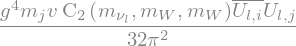

In [27]:
νlWW.AR().subs({lfvhd.D:4})

In [28]:
str(νlWW.AR().subs({lfvhd.D:4})).replace('m_a','ma').replace(
    'm_i','ml[i]').replace('m_j','ml[j]'
                       ).replace('m_W','mW').replace('m_{{\\nu_l}}','mnul').replace(
    'conjugate(U[l, i])','Ucli').replace('U[l, j]','Ulj').replace('{{B^{(12)}_{0}}}','B12_0')

'g**4*ml[j]*v*C_2(mnul, mW, mW)*Ucli*Ulj/(32*pi**2)'

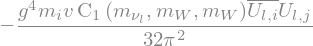

In [29]:
νlWW.AL().subs({lfvhd.D:4})#.subs(cambiosDivFin(*νlWuWd.masas)).simplify().subs(D,4)
#print('-'*200)

In [30]:
str(νlWW.AL().subs({lfvhd.D:4})).replace('m_a','ma').replace(
    'm_i','ml[i]').replace('m_j','ml[j]'
                       ).replace('m_W','mW').replace('m_{{\\nu_l}}','mnul').replace(
    'conjugate(U[l, i])','Ucli').replace('U[l, j]','Ulj').replace('{{B^{(12)}_{0}}}','B12_0')

'-g**4*ml[i]*v*C_1(mnul, mW, mW)*Ucli*Ulj/(32*pi**2)'

# Burbujas

This process also have Bubbles
## FV contribution
In this case we only have one contribution too, $\nu_{a} W^{+}$, the we need to consider the next couplings
$h e_{2} e_{2} \rightarrow \frac{ig m_2}{2\sqrt{2}m_W}$, $W^{+} \tau^{-} \nu_{a} \rightarrow i \frac{g}{\sqrt{2}}U^{\nu}_{1a} \gamma_\mu P_L$ and $ W^{-} \mu^{+} \nu_{a} \rightarrow i \frac{g}{\sqrt{2}}U^{\nu*}_{2a} \gamma_\nu P_L$ 

In [31]:
hljlj = lfvhd.VertexHFF((I*g*mj)/(2*sqrt(2)*mW))

nlW = lfvhd.BubbleFV(hljlj,Wuljνl,Wdliνl,[mnul,mW])
# MLL1 = nlW.AL().subs({lfvhd.D:4}).subs({lfvhd.A0(mW):lfvhd.PaVetoDivFin(lfvhd.A0(mW)),
#                                           lfvhd.B1_1(mnul,mW):lfvhd.PaVetoDivFin(lfvhd.B1_1(mnul,mW)),
#                              lfvhd.B1_0(mnul,mW):lfvhd.PaVetoDivFin(lfvhd.B1_0(mnul,mW))}).expand()

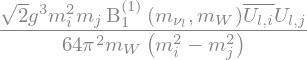

In [32]:
nlW.AR().subs({lfvhd.D:4})

In [33]:
str(nlW.AR().subs({lfvhd.D:4})).replace(
    'm_i','ml[i]').replace('m_j','ml[j]'
                       ).replace('m_W','mW').replace('m_{{\\nu_l}}','mnul').replace(
    'conjugate(U[l, i])','Ucli').replace('U[l, j]','Ulj').replace('{{B^{(1)}_{1}}}','B1_1')

'sqrt(2)*g**3*ml[i]**2*ml[j]*B1_1(mnul, mW)*Ucli*Ulj/(64*pi**2*mW*(ml[i]**2 - ml[j]**2))'

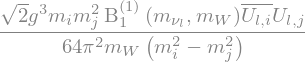

In [34]:
nlW.AL().subs({lfvhd.D:4})

In [35]:
str(nlW.AL().subs({lfvhd.D:4})).replace(
    'm_i','ml[i]').replace('m_j','ml[j]'
                       ).replace('m_W','mW').replace('m_{{\\nu_l}}','mnul').replace(
    'conjugate(U[l, i])','Ucli').replace('U[l, j]','Ulj').replace('{{B^{(1)}_{1}}}','B1_1')

'sqrt(2)*g**3*ml[i]*ml[j]**2*B1_1(mnul, mW)*Ucli*Ulj/(64*pi**2*mW*(ml[i]**2 - ml[j]**2))'

## ML

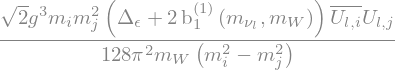

In [36]:
nlW.AL().subs(lfvhd.cambiosDivFin(mnul,mW,mW)).simplify().subs(lfvhd.D,4)

## MR


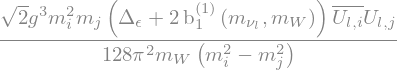

In [37]:
nlW.AR().subs(lfvhd.cambiosDivFin(mnul,mW,mW)).simplify().subs(lfvhd.D,4)

## Contributino VF

In [38]:
hlili = lfvhd.VertexHFF((I*g*mi)/(2*sqrt(2)*mW))
Wnl = lfvhd.BubbleVF(hlili,Wuljνl,Wdliνl ,[mnul,mW])

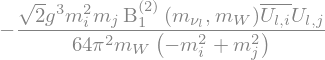

In [39]:
Wnl.AR().subs({lfvhd.D:4})

In [40]:
str(Wnl.AR().subs({lfvhd.D:4})).replace(
    'm_i','ml[i]').replace('m_j','ml[j]'
                       ).replace('m_W','mW').replace('m_{{\\nu_l}}','mnul').replace(
    'conjugate(U[l, i])','Ucli').replace('U[l, j]','Ulj').replace('{{B^{(2)}_{1}}}','B2_1')

'-sqrt(2)*g**3*ml[i]**2*ml[j]*B2_1(mnul, mW)*Ucli*Ulj/(64*pi**2*mW*(-ml[i]**2 + ml[j]**2))'

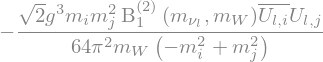

In [41]:
Wnl.AL().subs({lfvhd.D:4})#.subs({A0(mW):PaVetoDivFin(A0(mW)),B2_1(mnul,mW):PaVetoDivFin(B2_1(mnul,mW)),
                      #       B2_0(mnul,mW):PaVetoDivFin(B2_0(mnul,mW))})

In [42]:
str(Wnl.AL().subs({lfvhd.D:4})).replace(
    'm_i','ml[i]').replace('m_j','ml[j]'
                       ).replace('m_W','mW').replace('m_{{\\nu_l}}','mnul').replace(
    'conjugate(U[l, i])','Ucli').replace('U[l, j]','Ulj').replace('{{B^{(2)}_{1}}}','B2_1')

'-sqrt(2)*g**3*ml[i]*ml[j]**2*B2_1(mnul, mW)*Ucli*Ulj/(64*pi**2*mW*(-ml[i]**2 + ml[j]**2))'

## ML

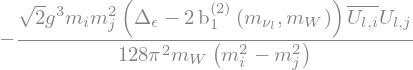

In [43]:
Wnl.AL().subs(lfvhd.cambiosDivFin(mnul,mW,mW)).simplify().subs(lfvhd.D,4)

## MR

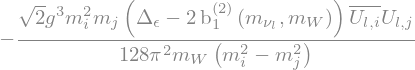

In [44]:
Wnl.AR().subs(lfvhd.cambiosDivFin(mnul,mW,mW)).simplify().subs(lfvhd.D,4)

### Pruebas burbujas FV y VF

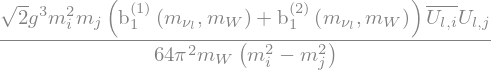

In [45]:
#divLnuW + divLWnu
#(divLnuW + divLWnu).simplify()
(nlW.AR().subs(lfvhd.cambiosDivFin(mnul,mW,mW)).simplify().subs(lfvhd.D,4) + 
Wnl.AR().subs(lfvhd.cambiosDivFin(mnul,mW,mW)).simplify().subs(lfvhd.D,4)).simplify()

## FS contribution
In this case we only have one contribution too, $\nu_{a} H^{+}$, the we need to consider the next couplings
$h e_{2} e_{2} \rightarrow \frac{ig m_2}{2\sqrt{2}m_W}$, $H^{+}\tau^{-} \nu_{l} \rightarrow i \frac{\sqrt{2}}{v} m_1 U^{\nu}_{l3} P_{R}$ and $H^{-}\mu^{+} \nu_{l} \rightarrow i \frac{\sqrt{2}}{v} m_2 U^{\nu *}_{l2} P_{L}$

In [46]:
#Hdμνl,Huτνl
nlG = lfvhd.BubbleFS(hljlj,Guljνl,Gdliνl,[mnul,mW])

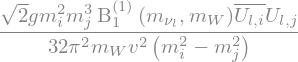

In [47]:
nlG.AR()

In [48]:
str(nlG.AR().subs({lfvhd.D:4})).replace(
    'm_i','ml[i]').replace('m_j','ml[j]'
                       ).replace('m_W','mW').replace('m_{{\\nu_l}}','mnul').replace(
    'conjugate(U[l, i])','Ucli').replace('U[l, j]','Ulj').replace('{{B^{(1)}_{1}}}','B1_1')

'sqrt(2)*g*ml[i]**2*ml[j]**3*B1_1(mnul, mW)*Ucli*Ulj/(32*pi**2*mW*v**2*(ml[i]**2 - ml[j]**2))'

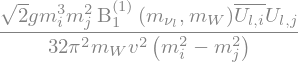

In [49]:
nlG.AL()

In [50]:
str(nlG.AL().subs({lfvhd.D:4})).replace(
    'm_i','ml[i]').replace('m_j','ml[j]'
                       ).replace('m_W','mW').replace('m_{{\\nu_l}}','mnul').replace(
    'conjugate(U[l, i])','Ucli').replace('U[l, j]','Ulj').replace('{{B^{(1)}_{1}}}','B1_1')

'sqrt(2)*g*ml[i]**3*ml[j]**2*B1_1(mnul, mW)*Ucli*Ulj/(32*pi**2*mW*v**2*(ml[i]**2 - ml[j]**2))'

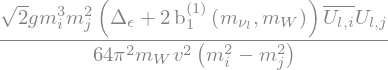

In [51]:
nlG.AL().subs(lfvhd.cambiosDivFin(mnul,mW,mW)).simplify()

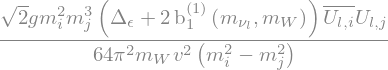

In [52]:
nlG.AR().subs(lfvhd.cambiosDivFin(mnul,mW,mW)).simplify()

## SF contribution
In this case we only have one contribution too, $H^{+} \nu_{l}$, the we need to consider the next couplings
$h e_{1} e_{1} \rightarrow \frac{ig m_1}{2\sqrt{2}m_W}$, $H^{+}\tau^{-} \nu_{l} \rightarrow i \frac{\sqrt{2}}{v} m_1 U^{\nu}_{l3} P_{R}$ and $H^{-}\mu^{+} \nu_{l} \rightarrow i \frac{\sqrt{2}}{v} m_2 U^{\nu *}_{l2} P_{L}$

In [53]:
Gnl = lfvhd.BubbleSF(hlili,Guljνl,Gdliνl,[mnul,mW])

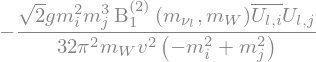

In [54]:
Gnl.AR()

In [55]:
str(Gnl.AR().subs({lfvhd.D:4})).replace(
    'm_i','ml[i]').replace('m_j','ml[j]'
                       ).replace('m_W','mW').replace('m_{{\\nu_l}}','mnul').replace(
    'conjugate(U[l, i])','Ucli').replace('U[l, j]','Ulj').replace('{{B^{(2)}_{1}}}','B2_1')

'-sqrt(2)*g*ml[i]**2*ml[j]**3*B2_1(mnul, mW)*Ucli*Ulj/(32*pi**2*mW*v**2*(-ml[i]**2 + ml[j]**2))'

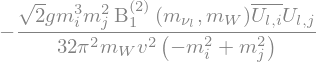

In [56]:
Gnl.AL()

In [57]:
str(Gnl.AL().subs({lfvhd.D:4})).replace(
    'm_i','ml[i]').replace('m_j','ml[j]'
                       ).replace('m_W','mW').replace('m_{{\\nu_l}}','mnul').replace(
    'conjugate(U[l, i])','Ucli').replace('U[l, j]','Ulj').replace('{{B^{(2)}_{1}}}','B2_1')

'-sqrt(2)*g*ml[i]**3*ml[j]**2*B2_1(mnul, mW)*Ucli*Ulj/(32*pi**2*mW*v**2*(-ml[i]**2 + ml[j]**2))'

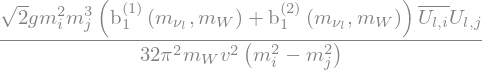

In [58]:
(Gnl.AR().subs(lfvhd.cambiosDivFin(mnul,mW,mW)).simplify() + 
nlG.AR().subs(lfvhd.cambiosDivFin(mnul,mW,mW)).simplify()).simplify()

## $M_L$ Total

In [59]:
Diagrams = [νlGG, νlGW, νlWG, νlWW, nlW, Wnl, nlG, Gnl]

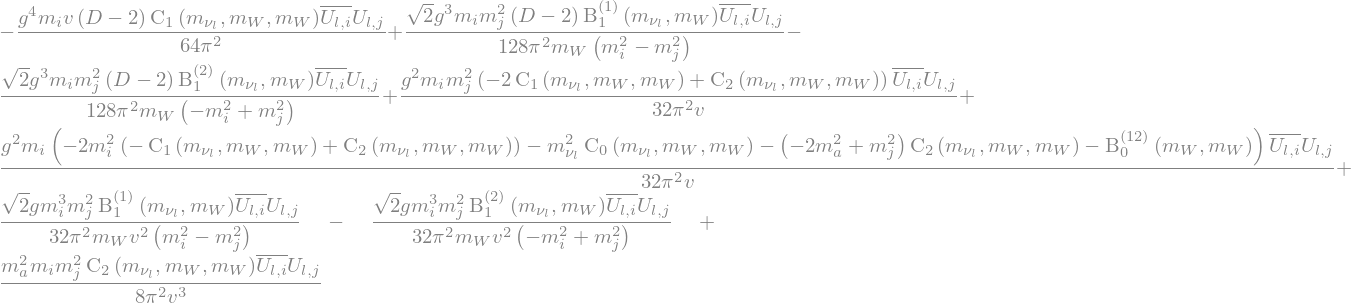

In [60]:
Add(*[D.AL() for D in Diagrams])#.expand().collect([mnul],evaluate=False).keys()

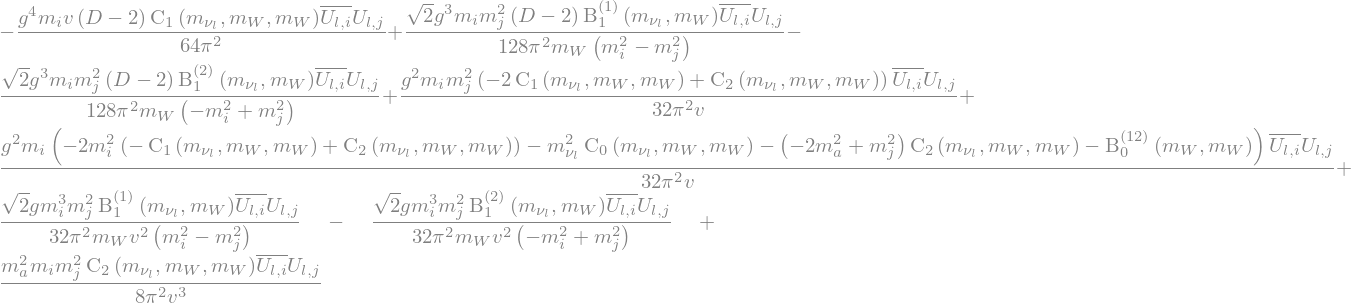

In [61]:
# ALtot = Add(*[D.AL() for D in Diagrams]).expand().collect(
#     [mnul],evaluate=False)[mnul**2]*mnul**2
ALtot = Add(*[D.AL() for D in Diagrams])#.expand().collect([mnul])
ALtot

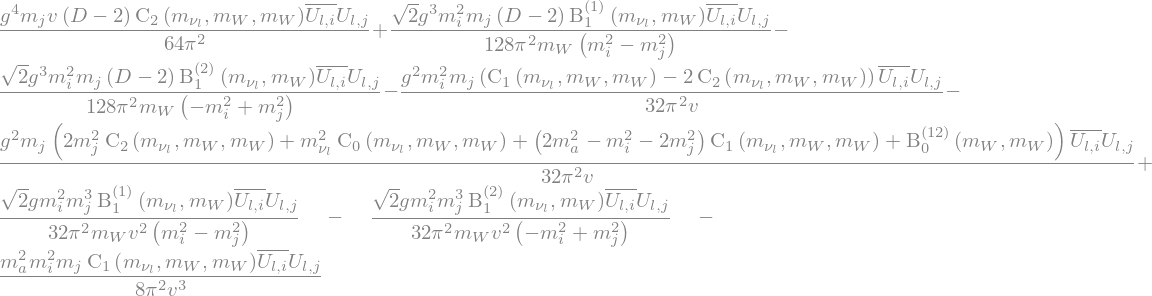

In [62]:
# ARtot = Add(*[D.AR() for D in Diagrams]).expand().collect(
#     [mnul],evaluate=False)[mnul**2]*mnul**2
ARtot = Add(*[D.AR() for D in Diagrams])#.expand().collect([mnul])
ARtot

In [63]:
from OneLoopLFVHD.data import ml
ml

{1: 0.000511, 2: 0.10566, 3: 1.77686}

In [64]:
mh = symbols('m_h',real=True)
valores ={mW:mp.mpf('80.379'),mh:mp.mpf('125.10'),
          g:(2*mp.mpf('80.379'))/mp.mpf('246'),v:mp.mpf('246')}

In [65]:
cambios_hij = lambda ii, jj:{lfvhd.ma:valores[mh],lfvhd.mi:ml[ii],lfvhd.mj:ml[jj]}

Ulj, Ucli = symbols('U_{lj}, {{U_{li}^*}}')
UOne = {U[l,j]:Ulj,conjugate(U[l,i]):Ucli}


In [66]:
from OneLoopLFVHD.data import replaceBs, pave_functions

In [67]:
#ALtot.subs(cambios_hij(1,2)).subs(valores).subs(UOne)

In [68]:
ALtot.atoms(Symbol)

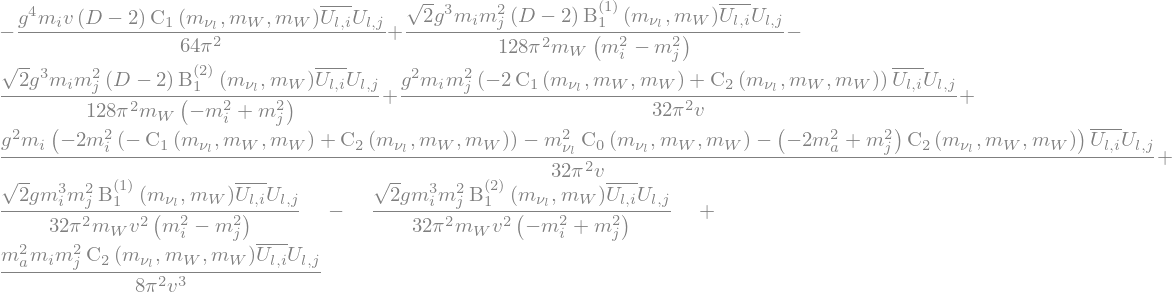

In [69]:
zero = lambda a,b: 0
ALtot.replace(lfvhd.B12_0,zero)

In [70]:
ALtot_mp = lambda i,j: lambdify([mnul,Ulj, Ucli],
    replaceBs(ALtot.replace(lfvhd.B12_0,zero)).subs(cambios_hij(i,j)).subs(lfvhd.D,4).subs(valores).subs(UOne),
                  modules=[pave_functions(valores[mh],i,j,lib='mpmath'),'mpmath'])

ARtot_mp = lambda i,j: lambdify([mnul,Ulj, Ucli],
    replaceBs(ARtot.replace(lfvhd.B12_0,zero)).subs(cambios_hij(i,j)).subs(lfvhd.D,4).subs(valores).subs(UOne),
                  modules=[pave_functions(valores[mh],i,j,lib='mpmath'),'mpmath'])

In [74]:
# from sympy import Function 
# f = symbols('f',cls=Function)
# zero = lambda a: 0
# f(1).replace(f,zero)

# Oscillations data

In [71]:
from OneLoopLFVHD.neutrinos import UpmnsStandardParametrization, NuOscObservables
Nudata = NuOscObservables

In [72]:
Upmns = mp.matrix([
[ 0.821302075974486,  0.550502406897554, 0.149699699398496],
[-0.555381876513578,  0.489988544456971, 0.738576482160108],
[ 0.333236993293153, -0.675912957636513, 0.657339166640784]])

# Sum over neutrino generations

In [83]:


d21 = mp.mpf(str(Nudata.squareDm21.central))*mp.mpf('1e-18')# factor to convert eV^2 to GeV^2
d31 = mp.mpf(str(Nudata.squareDm31.central))*mp.mpf('1e-18')
m1 = mp.mpf('1e-12')  #GeV 
m2 = mp.sqrt(m1**2 + d21)
m3 = mp.sqrt(m1**2 + d31)

def Aijtot(m1,ii,jj,quirality='L'):
    #m1 = mp.mpf('1e-12')  #GeV 
    #current values to Square mass differences
    U = Upmns
    
    AL = ALtot_mp(ii,jj)
    ALsuml =  (AL(m1,U[0,jj-1],mp.conj(U[0,ii-1])) + 
            AL(m2,U[1,jj-1],mp.conj(U[1,ii-1])) + 
            AL(m3,U[2,jj-1],mp.conj(U[2,ii-1])))
    AR = ARtot_mp(ii,jj)
    ARsuml =  (AR(m1,U[0,jj-1],mp.conj(U[0,ii-1])) + 
            AR(m2,U[1,jj-1],mp.conj(U[1,ii-1])) + 
            AR(m3,U[2,jj-1],mp.conj(U[2,ii-1])))
    if quirality=='L':
        out = ALsuml
    elif quirality=='R':
        out = ARsuml
    else:
        raise ValueError('quirality must be L or R')
    return out


In [84]:
def AL23tot(m1):
    return Aijtot(m1,2,3,'L')
def AR23tot(m1):
    return Aijtot(m1,2,3,'R')

def AL13tot(m1):
    return Aijtot(m1,1,3,'L')
def AR13tot(m1):
    return Aijtot(m1,1,3,'R')

def AL12tot(m1):
    return Aijtot(m1,1,2,'L')
def AR12tot(m1):
    return Aijtot(m1,1,2,'R')

In [85]:
mp.nprint(AR23tot(mp.mpf('1e-12')))
mp.nprint(AR13tot(mp.mpf('1e-12')))
mp.nprint(AR12tot(mp.mpf('1e-12')))


(2.10486e-20 + 0.0j)
(-2.12429e-6 + 0.0j)
(-8.38324e-8 + 0.0j)


In [231]:
# AL23tot = mp.memoize(mp.maxcalls(AL23tot, 2))
# AR23tot = mp.memoize(mp.maxcalls(AR23tot, 2))

# AL13tot = mp.memoize(mp.maxcalls(AL13tot, 2))
# AR13tot = mp.memoize(mp.maxcalls(AR13tot, 2))

# AL12tot = mp.memoize(mp.maxcalls(AL12tot, 2))
# AR12tot = mp.memoize(mp.maxcalls(AR12tot, 2))

In [86]:
from OneLoopLFVHD import Γhlilj
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
n = 10
expmp = mp.linspace(-15,-11,n)
Mmp = np.array([mp.mpf('10.0')**k for k in expmp])

In [88]:
ML23 = AL23tot(mp.mpf('1e-15'))
MR23 = AR23tot(mp.mpf('1e-15'))
mp.nprint(ML23)
mp.nprint(MR23)
W23 = Γhlilj(ML23, MR23,valores[mh],ml[2],ml[3]) 
mp.nprint(W23)

(1.25224e-21 + 0.0j)
(2.10486e-20 + 0.0j)
2.21123e-39


In [89]:
ML13 = AL13tot(mp.mpf('1e-15'))
MR13 = AR13tot(mp.mpf('1e-15'))
mp.nprint(ML13)
mp.nprint(MR13)
W13 = Γhlilj(ML13, MR13,valores[mh],ml[1],ml[3]) 
mp.nprint(W13)

(-6.11206e-10 + 0.0j)
(-2.12429e-6 + 0.0j)
2.2443e-11


In [90]:
ML12 = AL12tot(mp.mpf('1e-15'))
MR12 = AR12tot(mp.mpf('1e-15'))
mp.nprint(ML12)
mp.nprint(MR12)
W12 = Γhlilj(ML12, MR12,valores[mh],ml[1],ml[2]) 
mp.nprint(W12)

(-4.05436e-10 + 0.0j)
(-8.38324e-8 + 0.0j)
3.49825e-14


In [91]:
ml

{1: 0.000511, 2: 0.10566, 3: 1.77686}

In [92]:
%%time
YW23 = np.array([Γhlilj(AL23tot(m), AR23tot(m),valores[mh],ml[2],ml[3]) for m in Mmp])
YW13 = np.array([Γhlilj(AL13tot(m), AR13tot(m),valores[mh],ml[1],ml[3]) for m in Mmp])
YW12 = np.array([Γhlilj(AL12tot(m), AR12tot(m),valores[mh],ml[1],ml[2]) for m in Mmp])

CPU times: user 2min 32s, sys: 84.4 ms, total: 2min 32s
Wall time: 2min 33s


In [93]:
Wtot = YW23 + YW13 + YW12 + 0.0032

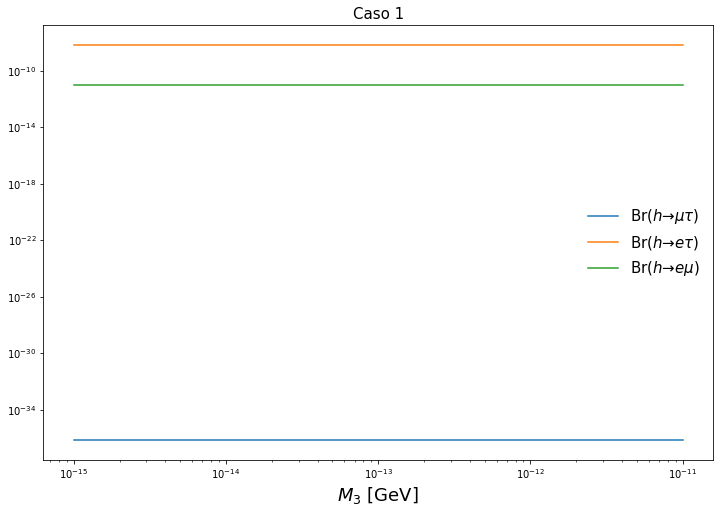

In [94]:
plt.figure(figsize=(12,8));
plt.loglog(Mmp,(YW23)/Wtot,label=r'Br($h \to \mu \tau$)');
plt.loglog(Mmp,(YW13 #+ YW31
                         )/Wtot,label=r'Br($h \to e \tau$)');
plt.loglog(Mmp,(YW12 #+ YW21
                         )/Wtot,label=r'Br($h \to e \mu$)');


#plt.xlim(1e2,1e3)
#plt.yticks(fontsize=18);
#plt.xticks(fontsize=18);

plt.title(r'Caso 1', fontsize=15);
plt.xlabel('$M_3$ [GeV]',fontsize=18);
plt.legend(fontsize=15,frameon=False);
#plt.savefig('caso1_with_nu.png',dpi=200)